## Testing Midaa
### Running MIDAA Analysis on a test dataset

It loads the dataset, prepares it, and runs the model fitting function.


In [1]:
import midaa as maa
import scanpy as sc

In [3]:
# 1. Load a test dataset
# This uses a standard processed dataset from scanpy
adata = sc.datasets.pbmc3k_processed()

# Show basic information about the dataset
print(adata)

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


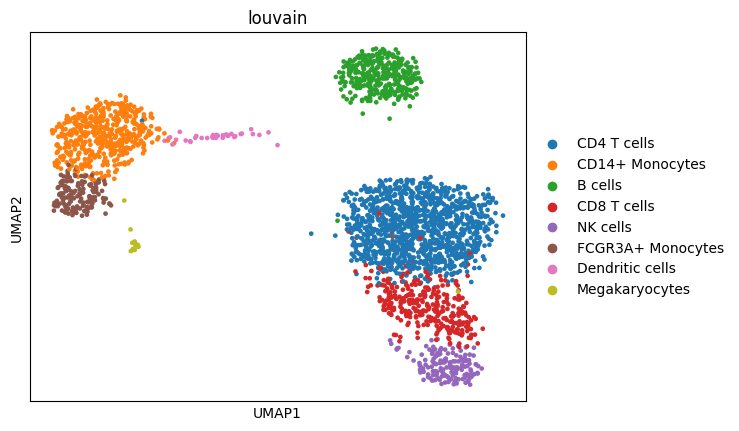

In [9]:
sc.pl.umap(adata, color="louvain")

In [ ]:
# 2. Prepare the input data for MIDAA
input_matrix, norm_factors, input_distribution = maa.get_input_params_adata(adata)

In [6]:
# 3. Define the number of archetypes
narchetypes = 5

In [7]:
# 4. Fit the MIDAA model
aa_result = maa.fit_MIDAA(
    input_matrix,
    norm_factors,
    input_distribution,
    narchetypes = narchetypes
)

ELBO: 29556396.00000  : 100%|██████████| 2000/2000 [10:53<00:00,  3.06it/s]
/opt/anaconda3/envs/MIDAA/lib/python3.11/site-packages/pyro/primitives.py:163: RuntimeWarning: trying to observe a value outside of inference at loss
  warnings.warn(


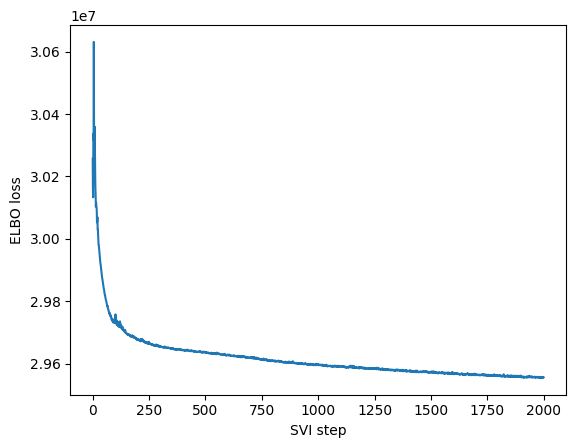

In [13]:
maa.plot_ELBO(aa_result)


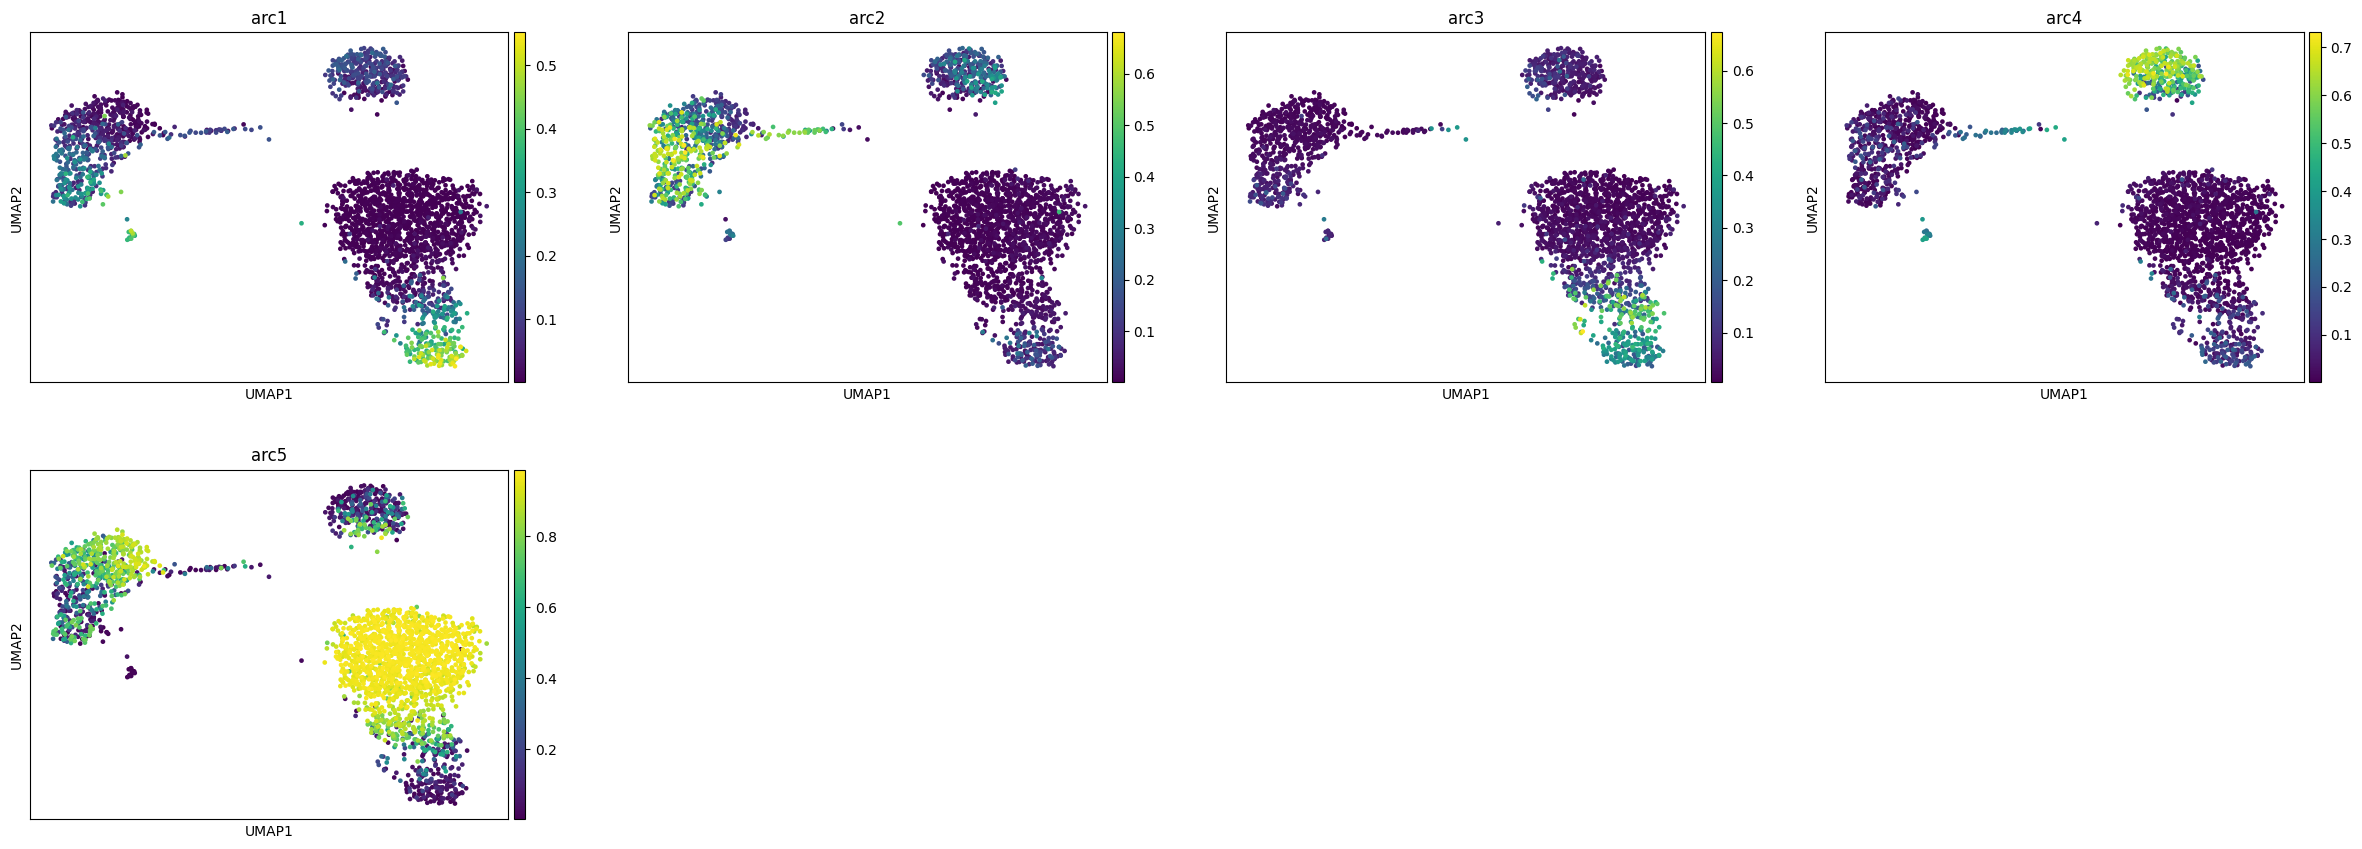

In [15]:
adata, arc_names = maa.add_to_obs_adata(aa_result, adata)
sc.pl.umap(adata, color = arc_names)

In [63]:

# 1. High-Level Output Keys (The Top Layer)
print("--- 1. High-Level Output Keys ---")
# Shows the four main containers: inferred_quantities, hyperparameters, ELBO, deepAA_obj
print(f"Top-level keys:\n{aa_result.keys()}\n")

# 2. Model Configuration (What were the settings?)
print("--- 2. Hyperparameters (Model Settings) ---")
# Shows all parameters used for training (learning rate, epochs, narchetypes, etc.)
print(f"Configuration keys:\n{aa_result['hyperparameters'].keys()}\n")

# 3. Core Results (Where the matrices are)
print("--- 3. Inferred Quantities (Core Results) ---")
# This is the most important output, revealing the keys for the A, Z, and intermediate matrices.
# Keys like 'A', 'archetypes_inferred', and 'Z' (latent) are found here.
print(f"Inferred Results keys:\n{aa_result['inferred_quantities'].keys()}\n")

# 4. Training Metrics (Debugging/Model Status)
#print("--- 4. Training Metrics and Object ---")
# ELBO is the loss function; prints the final ELBO value or the array of losses.
#print(f"Final/Last ELBO (Loss Value): {aa_result['ELBO']}")
# deepAA_obj is the instantiated, trained model object itself.
#print(f"Trained Model Object (deepAA_obj):\n{aa_result['deepAA_obj']}")

print("\nMIDAA analysis complete.")

--- 1. High-Level Output Keys ---
Top-level keys:
dict_keys(['inferred_quantities', 'hyperparameters', 'ELBO', 'deepAA_obj'])

--- 2. Hyperparameters (Model Settings) ---
Configuration keys:
dict_keys(['normalization_factor', 'input_types', 'loss_weights_reconstruction', 'input_types_side', 'loss_weights_side', 'hidden_dims_dec_common', 'hidden_dims_dec_last', 'hidden_dims_dec_last_side', 'hidden_dims_enc_ind', 'hidden_dims_enc_common', 'hidden_dims_enc_pre_Z', 'layers_independent_types', 'layers_independent_types_side', 'image_size', 'narchetypes', 'model_matrix', 'just_VAE', 'linearize_encoder', 'linearize_decoder', 'VAE_steps', 'CUDA', 'lr', 'gamma_lr', 'steps', 'fix_Z', 'initialization_B_weight', 'Z_fix_norm', 'Z_fix_release_step', 'reconstruct_input_and_side', 'initialization_steps_phase_1', 'initialization_lr_phase_1', 'initialization_steps_phase_2', 'initialization_lr_phase_2', 'torch_seed', 'batch_size', 'kernel_size', 'stride', 'padding', 'pool_size', 'pool_stride'])

--- 3. I

## Accessing the Infered Quantities (matrixes A and Z)

- A: Defines the archetypes (n=5) in terms of biological features.
- Z: Defines each sample as a combination of the archetypes

In [58]:

# Print matrices and shape
print("--- Inferred Matrices ---")
A_matrix = aa_result['inferred_quantities']['A']
B_matrix = aa_result['inferred_quantities']['B']
Z_matrix = aa_result['inferred_quantities']['Z']
archetypes_inferred = aa_result['inferred_quantities']['archetypes_inferred']

print("Shapes of Inferred Matrices:")
print(f"A Matrix Shape: {A_matrix.shape}")
print(f"B Matrix Shape: {B_matrix.shape}")
print(f"Z Final Matrix Shape: {Z_matrix.shape}")
print(f"Archetypes Inferred Shape: {archetypes_inferred.shape}\n")

print(f"A Matrix: \n {A_matrix} \n")
print(f"B Matrix: \n {B_matrix} \n")
print(f"Z Final Matrix: \n {Z_matrix}")
print(f"Archetypes Inferred: \n {archetypes_inferred}")   


--- Inferred Matrices ---
Shapes of Inferred Matrices:
A Matrix Shape: (2638, 5)
B Matrix Shape: (5, 2638)
Z Final Matrix Shape: (2638, 4)
Archetypes Inferred Shape: (5, 4)

A Matrix: 
 [[0.00343905 0.00343174 0.04382696 0.01662296 0.9326793 ]
 [0.1552473  0.05614372 0.13677758 0.6343234  0.01750795]
 [0.02344558 0.0187903  0.05043514 0.00397288 0.9033561 ]
 ...
 [0.01382274 0.0593126  0.01663858 0.1934072  0.7168189 ]
 [0.18633214 0.13072821 0.05917497 0.6063425  0.01742226]
 [0.00351471 0.02144424 0.01783336 0.0024819  0.95472574]] 

B Matrix: 
 [[1.7112846e-10 6.3514092e-09 1.8945875e-05 ... 1.4500822e-09
  7.3141582e-09 1.3303411e-06]
 [2.6914562e-04 4.3773194e-04 2.7066928e-06 ... 1.5818992e-03
  7.5273309e-04 2.3658198e-05]
 [2.6345917e-06 4.8286017e-07 5.2996274e-06 ... 4.8677033e-05
  1.5527334e-06 1.6285501e-03]
 [1.2513851e-03 2.1093361e-05 5.3929514e-04 ... 6.2823182e-07
  5.0062749e-06 1.7505356e-06]
 [3.8364824e-04 3.8395336e-04 2.4408761e-04 ... 5.9143838e-04
  3.2301529e

(<Figure size 640x480 with 1 Axes>, <PolarAxes: >)

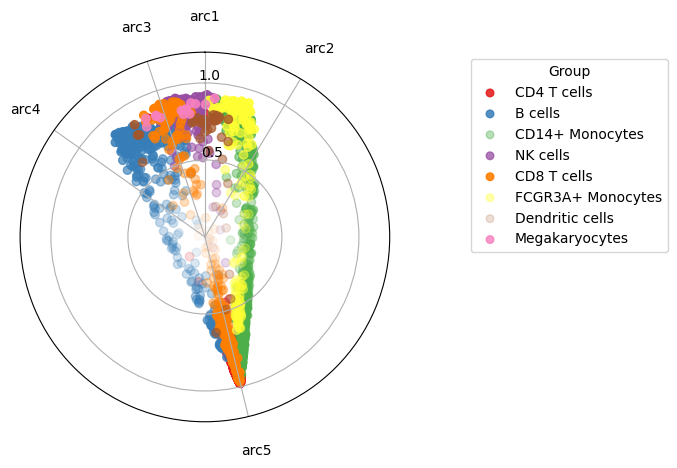

In [52]:
maa.plot_archetypes_simplex(aa_result, color_by = adata.obs["louvain"], cmap = "Set1")


In [ ]:
# 1. Extract the B Matrix (Archetype Definition: 5 x 2638)
B_matrix_raw = aa_result['inferred_quantities']['B']

# 2. Get the number of features (genes) from the AnnData object (1838)
num_rna_features = adata.n_vars 

# 3. SLICE: Keep only the first 1838 columns (the RNA features)
B_rna_features = B_matrix_raw[:, :num_rna_features]

# 4. TRANSPOSE: Convert to the standard (Features x Archetypes) shape (1838 x 5)
A_features_matrix = B_rna_features.T 

# 5. Extract feature (gene) names for indexing
feature_names_array = np.array(adata.var_names)

num_archetypes = A_features_matrix.shape[1]
top_n = 10

print("--- Top Marker Genes for Each Archetype (from B Matrix) ---")

for i in range(num_archetypes):
    # Get the column corresponding to the current archetype
    archetype_profile = A_features_matrix[:, i]
    
    # Get the indices of the top N features (Descending order)
    top_indices = np.argsort(archetype_profile)[-top_n:][::-1]
    
    # Use NumPy indexing to get the names and scores
    top_marker_names = feature_names_array[top_indices]
    top_marker_scores = archetype_profile[top_indices]
    
    print(f"## Archetype {i+1} Markers:")
    for name, score in zip(top_marker_names, top_marker_scores):
        print(f"- **{name}**: {score:.4f}")
    print("\n" + "-"*30)

--- Top Marker Genes for Each Archetype (from B Matrix) ---
## Archetype 1 Markers:
- **IFIT2**: 0.0151
- **TRIP12**: 0.0132
- **TOP2B**: 0.0128
- **LY6G6F**: 0.0122
- **TTC14**: 0.0121
- **SNHG8**: 0.0111
- **RRAGC**: 0.0108
- **FAM43A**: 0.0103
- **TACR2**: 0.0100
- **SLC16A5**: 0.0094

------------------------------
## Archetype 2 Markers:
- **HNRNPM**: 0.0031
- **RAMP1**: 0.0030
- **SMDT1**: 0.0029
- **KIF5B**: 0.0029
- **ATXN7L3B**: 0.0029
- **DHRS4**: 0.0029
- **RP11-400F19.6**: 0.0029
- **ARL6IP5**: 0.0028
- **RNF187**: 0.0028
- **CD93**: 0.0028

------------------------------
## Archetype 3 Markers:
- **SPEN**: 0.0091
- **MTIF2**: 0.0089
- **ITPA**: 0.0077
- **SH3KBP1**: 0.0076
- **PLA2G4C**: 0.0073
- **CKS1B**: 0.0067
- **MDS2**: 0.0063
- **HCFC2**: 0.0060
- **SETD1B**: 0.0057
- **ATP5O**: 0.0057

------------------------------
## Archetype 4 Markers:
- **FCAR**: 0.0060
- **TAPBP**: 0.0060
- **PSMA1**: 0.0050
- **TTC3**: 0.0050
- **SCAI**: 0.0049
- **DNMT3A**: 0.0049
- **UBE2D